# Brain Scan Image Classification Modeling:
## Using machine learning to discern between brain hemorrhagic and normal in CT brain scans

##### Objective: The aim of this project is to create a model that can evaluate CT brain scan images and determine if hemorrhaging is present, or if the brain is otherwise normal (not suffering from hemorrhaging). We will be building a binary classification model.

###### Data: The dataset is balanced with 5410 total samples (2685 Hemorrhagic, and 2725 Normal) available between both categories/groups.

###### Existing Work: As a benchmark for our work, we research previous work done in the space to see if we might be able to beat the performance of previous researchers/data scientist. An article from Diagnostic Imaging, written by Katie Robinson details the work of a group of researchers (not inclusive of Katie) in November 2021. According to the article, their team was able to get to an accuracy of 96.6% for detection of normal brain scans. This appeared to be the same accuracy for the model overall. In the article it is also noted that a doctor had also been tested with a separate dataset. The doctor achieved 91% accuracy. My aim to beat at least 91% on the low-end, and 96% on the high-end.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

# Dataset setup, preprocessing, and wrangling

In [2]:
# Pulling file names from folder directory into list variable
file_list = glob('/Users/pat/PycharmProjects/ML_project/Hem1/*.jpg')
file_list2 = glob('/Users/pat/PycharmProjects/ML_project/Normal Scans/*.jpg')
# Using comprehension to iterate through file listing and creating arrays of image data
images = np.array([np.array(Image.open(fname)) for fname in file_list])
norm_images = np.array([np.array(Image.open(fname)) for fname in file_list2])

Text(0.5, 1.0, 'Hemorrhagic CT Scan')

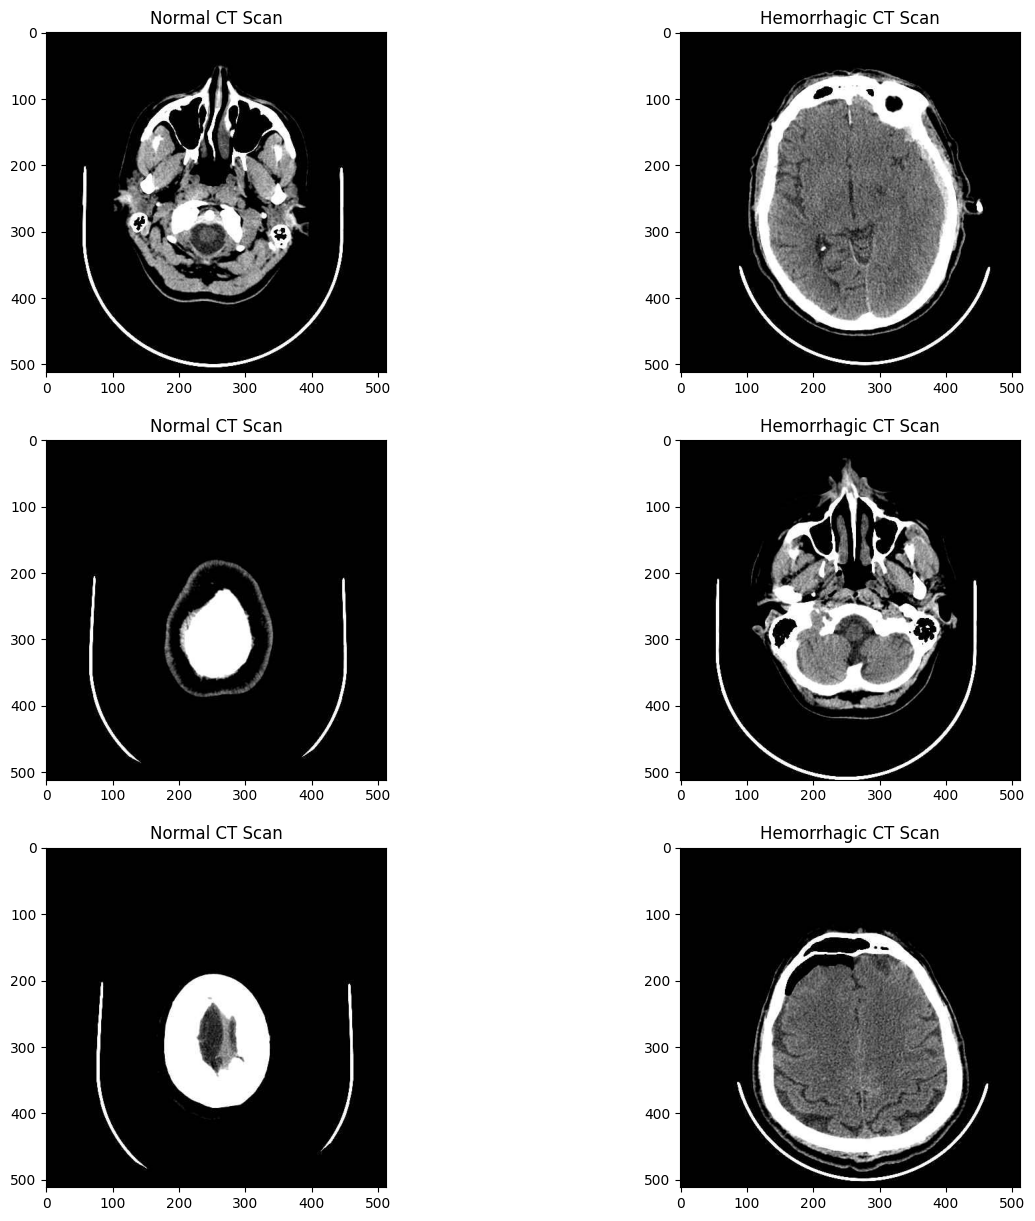

In [3]:
# Plotting image scans of one normal CT scan image, and one hemorrhagic CT scan image for visual comparison
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.imshow(norm_images[296])
plt.title('Normal CT Scan')
plt.subplot(3,2,2)
plt.imshow(images[267])
plt.title('Hemorrhagic CT Scan')
plt.subplot(3,2,3)
plt.imshow(norm_images[183])
plt.title('Normal CT Scan')
plt.subplot(3,2,4)
plt.imshow(images[684])
plt.title('Hemorrhagic CT Scan')
plt.subplot(3,2,5)
plt.imshow(norm_images[1230])
plt.title('Normal CT Scan')
plt.subplot(3,2,6)
plt.imshow(images[84])
plt.title('Hemorrhagic CT Scan')

In [4]:
# Confirming number of samples for each group
images.shape
norm_images.shape

(2725, 512, 512, 3)

In [5]:
images.shape

(2685, 512, 512, 3)

In [6]:
# Creating our y variable using number of samples contained for each group/category
hem = np.ones(2685).astype(dtype=int)
normal = np.zeros(2725).astype(dtype=int)
y = np.concatenate((hem, normal))

In [7]:
y.shape

(5410,)

In [8]:
# Creating our x variable
x = np.concatenate((images, norm_images))

In [9]:
x.shape

(5410, 512, 512, 3)

In [10]:
# Using seed to shuffle our data so that 1) our data isn't in perfect sequence with all hemorrhagic scans stacked on top of normal scans, and 2) our indexes are the same, so we have the correct labels lining up with their corresponding images.
np.random.seed(15)
np.random.shuffle(x)
np.random.seed(15)
np.random.shuffle(y)

# Modeling
#### Baseline Logistic Regression Model
#### DNN
#### Random Forest Classifier

##### Baseline Logistic Regression Model

In [11]:
# Importing necessary libraries for our splitting and modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
# Splitting our data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3)

In [13]:
x_test.shape

(1623, 512, 512, 3)

In [14]:
# Standardizing our image data
x_train1 = x_train/255
x_test1 = x_test/255

# Flatening for our logistic regression model
d1, d2, d3, d4 = x_train1.shape
x_train_reshaped = x_train1.reshape((d1, d2*d3*d4))
x_test_reshaped = x_test1.reshape((1623, d2*d3*d4))

In [45]:
# Creating our logistic regression function and fitting our model
logreg = LogisticRegression()
logreg.fit(x_train_reshaped,y_train)

/Users/pat/PycharmProjects/ML_project/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# Score
logreg.score(x_test_reshaped, y_test)

0.9969192852741836

In [47]:
# Predictions
y_pred_bline = logreg.predict(x_test_reshaped)

In [48]:
# Classification Report
print(classification_report(y_test, y_pred_bline))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       770

    accuracy                           1.00      1623
   macro avg       1.00      1.00      1.00      1623
weighted avg       1.00      1.00      1.00      1623



In [73]:
# Confusion Matrix
cm_bline = confusion_matrix(y_test, y_pred_bline)
cm_bline1 = pd.DataFrame(cm_bline)
cm_bline1.style.background_gradient(cmap='summer', vmin=2, vmax=850)

,0,1
0,850,3
1,2,768


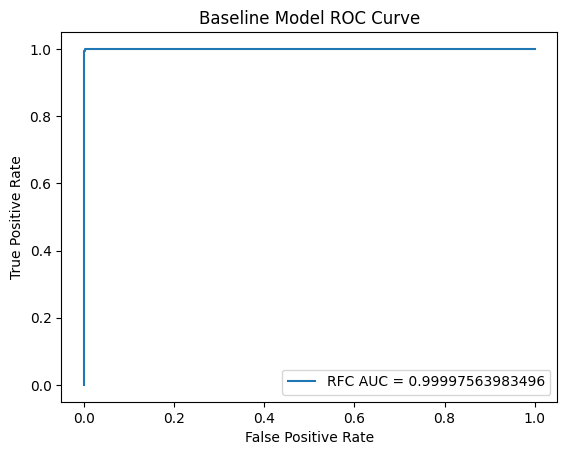

In [52]:
y_pred_bline_prob = logreg.predict_proba(x_test_reshaped)[::,1]
bline_auc = roc_auc_score(y_test, y_pred_bline_prob)

bline_fpr, bline_tpr, bline_thresh = roc_curve(y_test, y_pred_bline_prob)

plt.plot(bline_fpr, bline_tpr, label='RFC AUC = '+str(bline_auc))
plt.title('Baseline Model ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

##### Neural Network Model

In [22]:
# Importing the necessary libraries and functions for our DNN
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (512,512,3)))
model.add(tf.keras.layers.Dense(50, activation = "relu", input_dim=512*512*3))
model.add(tf.keras.layers.Dense(50, activation = "relu"))
model.add(tf.keras.layers.Dense(50, activation = "relu"))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=["accuracy"])

In [23]:
model.fit(x_train1, y_train, epochs=25, validation_data=(x_test1, y_test))

Epoch 1/25
119/119 [==============================] - 48s 405ms/step - loss: 1.3998 - accuracy: 0.8841 - val_loss: 0.0314 - val_accuracy: 0.9858
Epoch 2/25
119/119 [==============================] - 6s 49ms/step - loss: 0.0602 - accuracy: 0.9778 - val_loss: 0.0679 - val_accuracy: 0.9741
Epoch 3/25
119/119 [==============================] - 6s 48ms/step - loss: 0.0433 - accuracy: 0.9836 - val_loss: 0.2276 - val_accuracy: 0.9396
Epoch 4/25
119/119 [==============================] - 6s 48ms/step - loss: 0.0513 - accuracy: 0.9868 - val_loss: 0.0145 - val_accuracy: 0.9969
Epoch 5/25
119/119 [==============================] - 6s 49ms/step - loss: 0.2473 - accuracy: 0.9575 - val_loss: 0.1633 - val_accuracy: 0.9710
Epoch 6/25
119/119 [==============================] - 6s 48ms/step - loss: 0.0471 - accuracy: 0.9900 - val_loss: 0.0389 - val_accuracy: 0.9889
Epoch 7/25
119/119 [==============================] - 6s 49ms/step - loss: 0.0185 - accuracy: 0.9963 - val_loss: 0.0272 - val_accuracy: 0.99

In [33]:
model.evaluate(x_train1, y_train)

119/119 [==============================] - 1s 9ms/step - loss: 2.6637e-06 - accuracy: 1.0000


[2.663731038410333e-06, 1.0]

In [32]:
model.evaluate(x_test1, y_test)

51/51 [==============================] - 0s 8ms/step - loss: 0.0112 - accuracy: 0.9975


[0.01124607864767313, 0.9975354075431824]

In [57]:
y_pred_dnn = model.predict(x_test1)

51/51 [==============================] - 1s 13ms/step


In [58]:
y_pred_dnn = np.array([1 if x > .05 else 0 for x in y_pred_dnn])

In [59]:
y_pred_dnn

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
print(classification_report(y_test, y_pred_dnn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       770

    accuracy                           1.00      1623
   macro avg       1.00      1.00      1.00      1623
weighted avg       1.00      1.00      1.00      1623



In [74]:
import pandas as pd
cm_dnn = confusion_matrix(y_test, y_pred_dnn)
cm_dnn
cm_dnn1= pd.DataFrame(cm_dnn)
cm_dnn1.style.background_gradient(cmap='autumn', vmin=1, vmax= 851)

,0,1
0,851,2
1,1,769


In [24]:
from sklearn.metrics import roc_auc_score
y_pred_dnn_prob = model.predict(x_test1)

51/51 [==============================] - 1s 13ms/step


In [56]:
roc_auc_score(y_test, y_pred_dnn_prob)

0.9999939099587399

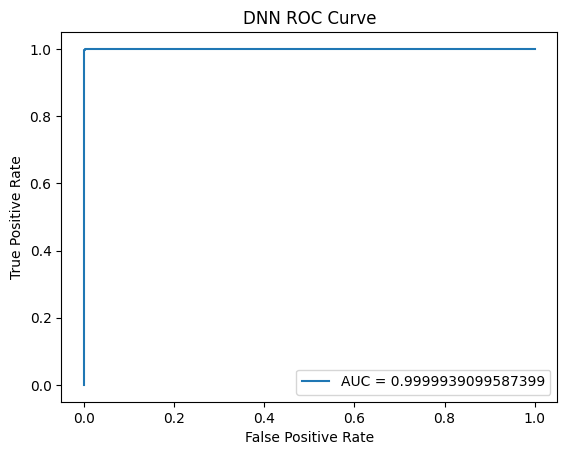

In [43]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test, y_pred_dnn_prob)

plt.plot(fpr, tpr, label='AUC = '+str(roc_auc_score(y_test, y_pred_dnn_prob)))
plt.title('DNN ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

##### Random Forest Model

In [33]:
# Importing our random forest classifier function and assigning to rfc for fitting to the flattened, standardized dataset
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train_reshaped, y_train)

RandomForestClassifier(n_estimators=50)

In [34]:
# Score
rfc.score(x_train_reshaped, y_train)

1.0

In [35]:
rfc.score(x_test_reshaped, y_test)

0.9950708564386938

In [36]:
# Predictions
y_pred_rfc = rfc.predict(x_test_reshaped)

In [37]:
# Classification Report
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       853
           1       1.00      0.99      0.99       770

    accuracy                           1.00      1623
   macro avg       1.00      0.99      1.00      1623
weighted avg       1.00      1.00      1.00      1623



In [72]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_rfc1 = pd.DataFrame(cm_rfc)
cm_rfc1.style.background_gradient(cmap='winter', vmin=2 , vmax = 851)

,0,1
0,851,2
1,6,764


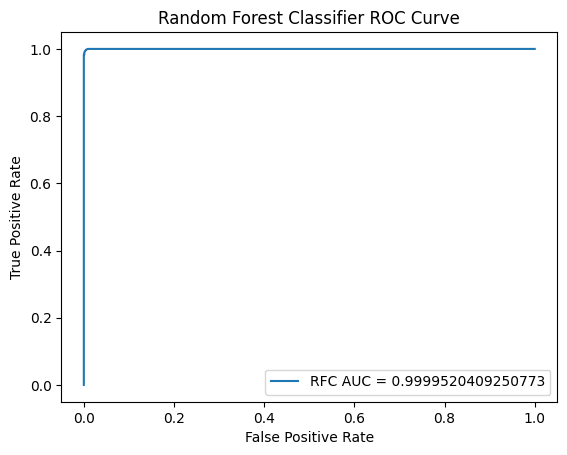

In [42]:
y_pred_rfc_prob = rfc.predict_proba(x_test_reshaped)[::,1]
rfc_auc = roc_auc_score(y_test, y_pred_rfc_prob)

rfc_fpr, rfc_tpr, rfc_thresh = roc_curve(y_test, y_pred_rfc_prob)

plt.plot(rfc_fpr, rfc_tpr, label='RFC AUC = '+str(rfc_auc))
plt.title('Random Forest Classifier ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

In [78]:
import pandas as pd
metrics = {
    'Bline': [logreg.score(x_test_reshaped, y_test),rfc_auc],
    'DNN': [model.evaluate(x_test1, y_test)[1],roc_auc_score(y_test, y_pred_dnn_prob)],
    'RFC' : [rfc.score(x_test_reshaped, y_test),rfc_auc]
}
index = ['Accuracy', 'Area Under Curve']
metrics_df = pd.DataFrame(metrics, index= index)
metrics_df

51/51 [==============================] - 1s 12ms/step - loss: 0.0061 - accuracy: 0.9975


,Bline,DNN,RFC
Accuracy,0.996919,0.997535,0.995071
Area Under Curve,0.999952,0.999994,0.999952
